In [1]:
import ee
import datetime

import geopandas as gp
import pandas as pd
import numpy as np
import rsfuncs as rs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

ee.Initialize()

In [2]:
# Sat data
data = rs.load_data()

In [3]:
# Any shapefile here
cvw = gp.read_file("../shape/HU4_merged.shp")

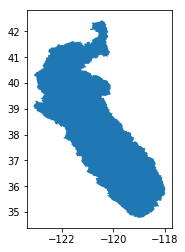

In [6]:
cvw.plot()

In [4]:
area = rs.gdf_to_ee_poly(cvw)

In [13]:
# Params
years = range(2001, 2018)
months = range(1,13)
start = datetime.datetime(years[0], 1, 1)
end = datetime.datetime(years[-1]+1, 1, 1)
dt_idx = pd.date_range(start,end, freq='M')

In [ ]:
# These take a while for the whole CV, so i'll let you run it for whatever area you like

In [7]:
gswe = rs.calc_monthly_sum(data['gldas_swe'],years, months, area)

1.4305022175202027
3.066434814600659
3.4145821117497586


KeyboardInterrupt: 

In [ ]:
nswe = rs.calc_monthly_sum(data['nldas_swe'],years, months, area)

In [8]:
df = pd.read_csv("../data/RS_DAT_FIN_monthly_2001_2018_CVWshed.csv")

Text(0, 0.5, 'SWE ($km^3$)')

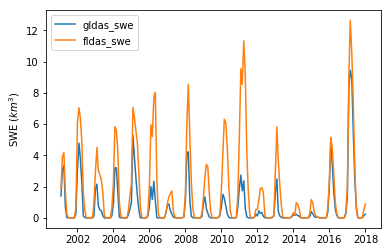

In [15]:
plt.plot(dt_idx,df.gldas_swe[:-1])
plt.plot(dt_idx,df.fldas_swe[:-1])
plt.legend()
plt.ylabel("SWE ($km^3$)")